In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
data = pd.read_csv('/content/lung_cancer.csv')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   GENDER                309 non-null    object
 1   AGE                   309 non-null    int64 
 2   SMOKING               309 non-null    int64 
 3   YELLOW_FINGERS        309 non-null    int64 
 4   ANXIETY               309 non-null    int64 
 5   PEER_PRESSURE         309 non-null    int64 
 6   CHRONICDISEASE        309 non-null    int64 
 7   FATIGUE               309 non-null    int64 
 8   ALLERGY               309 non-null    int64 
 9   WHEEZING              309 non-null    int64 
 10  ALCOHOLCONSUMING      309 non-null    int64 
 11  COUGHING              309 non-null    int64 
 12  SHORTNESSOFBREATH     309 non-null    int64 
 13  SWALLOWINGDIFFICULTY  309 non-null    int64 
 14  CHESTPAIN             309 non-null    int64 
 15  LUNG_CANCER           309 non-null    ob

In [ ]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONICDISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOLCONSUMING,COUGHING,SHORTNESSOFBREATH,SWALLOWINGDIFFICULTY,CHESTPAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
data.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONICDISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOLCONSUMING,COUGHING,SHORTNESSOFBREATH,SWALLOWINGDIFFICULTY,CHESTPAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [ ]:
data['LUNG_CANCER'] = data['LUNG_CANCER'].astype('category')
data['GENDER'] = data['GENDER'].astype('category')

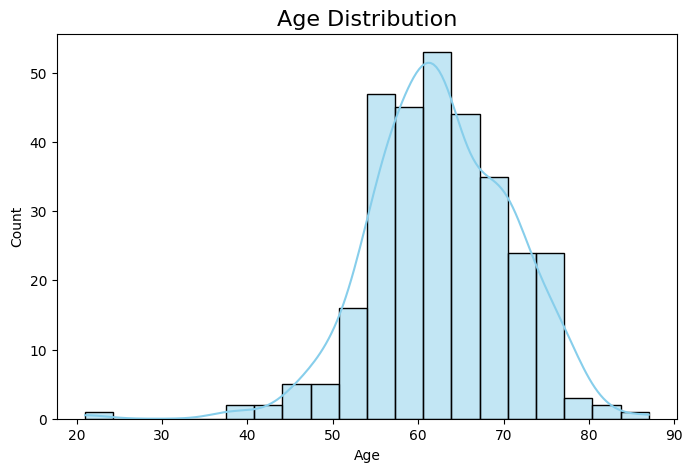

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['AGE'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

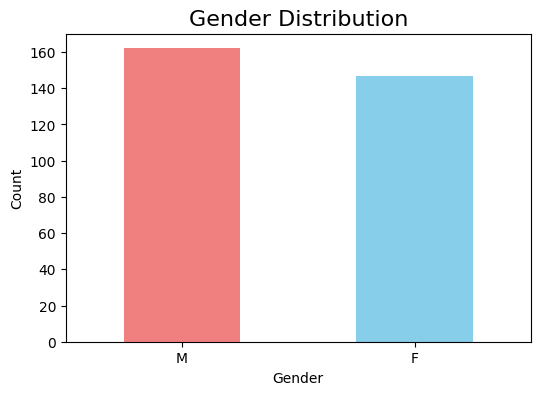

In [ ]:
plt.figure(figsize=(6, 4))
data['GENDER'].value_counts().plot(kind='bar', color=['lightcoral', 'skyblue'])
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

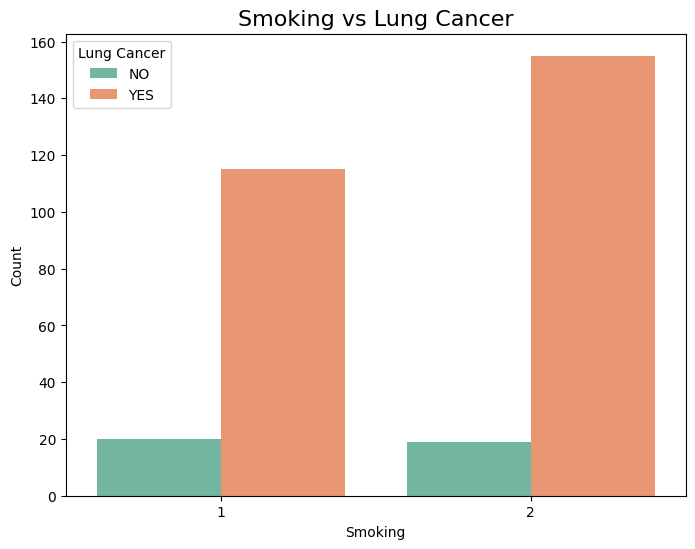

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SMOKING', hue='LUNG_CANCER', data=data, palette='Set2')
plt.title('Smoking vs Lung Cancer', fontsize=16)
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.legend(title='Lung Cancer')
plt.show()

In [ ]:
X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])
data['LUNG_CANCER'] = label_encoder.fit_transform(data['LUNG_CANCER'])

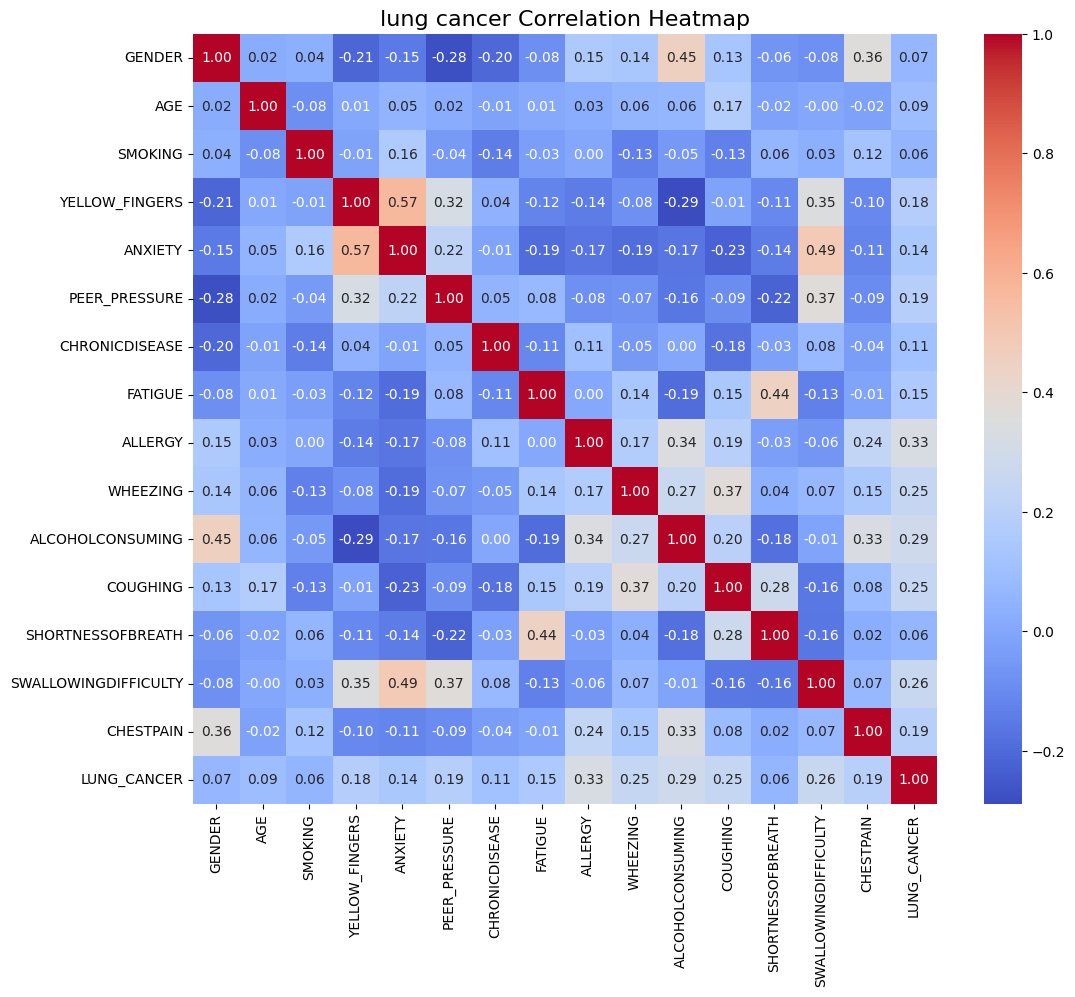

In [ ]:
correlation = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('lung cancer Correlation Heatmap', fontsize=16)
plt.show()

In [ ]:
categorical_cols = [col for col in X.columns if X[col].dtype == 'O']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

In [ ]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
X = data.drop(columns=['LUNG_CANCER'])
y = data['LUNG_CANCER']


In [ ]:
pd.get_dummies(X, drop_first=True)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONICDISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOLCONSUMING,COUGHING,SHORTNESSOFBREATH,SWALLOWINGDIFFICULTY,CHESTPAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logistic_regression = LogisticRegression(max_iter=1000)
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', logistic_regression)])

In [ ]:
logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred =logistic_regression.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.77%


Confusion Matrix:
[[ 1  1]
 [ 1 59]]


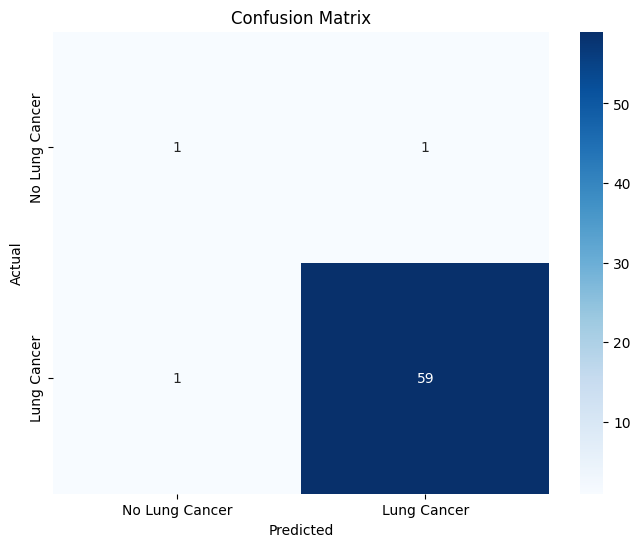

In [ ]:
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Lung Cancer', 'Lung Cancer'], yticklabels=['No Lung Cancer', 'Lung Cancer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


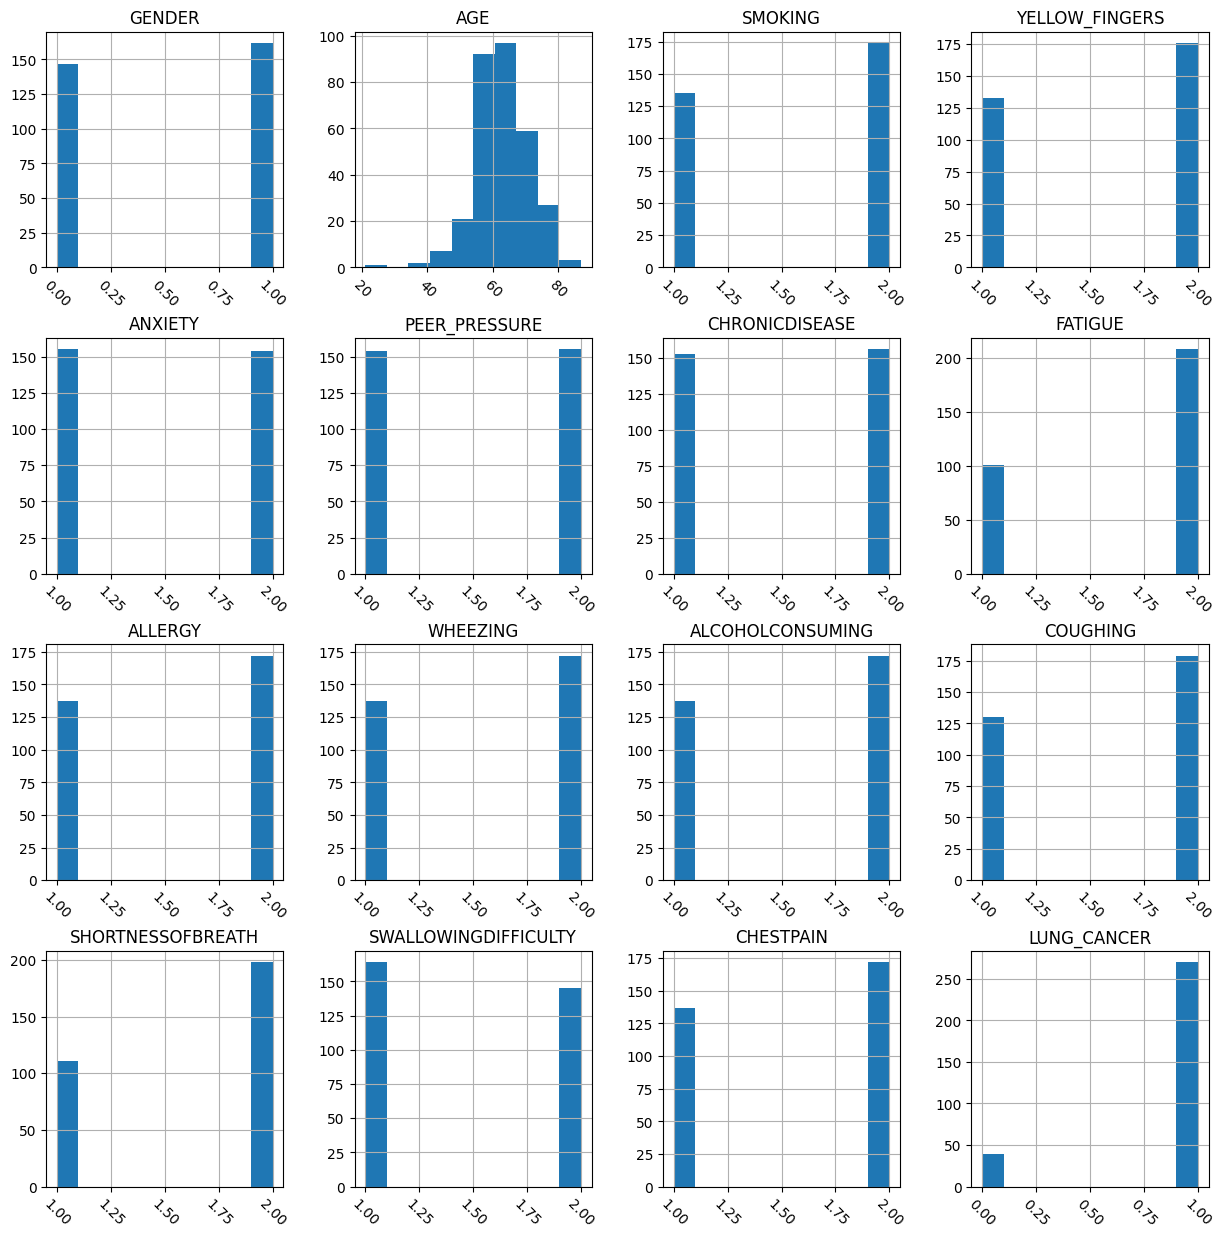

In [ ]:
#Plot histogram grid
data.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()